# 03 – Neural Network Regression

Modelo de red neuronal para predecir `Und_2a_percentage` a partir del dataset limpio.


In [1]:
from pathlib import Path
import sys

cwd = Path().resolve()
PROJECT_ROOT = None

for parent in [cwd, *cwd.parents]:
    if (parent / "src").is_dir():
        PROJECT_ROOT = parent
        break

if PROJECT_ROOT is None:
    raise RuntimeError("No se encontró carpeta 'src' en la jerarquía.")

if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

from src.config.settings import (
    PROJECT_ROOT as CFG_PROJECT_ROOT,
    TARGET_COL,
    RANDOM_STATE,
)
from src.data.load_data import load_clean_dataset

print("PROJECT_ROOT:", CFG_PROJECT_ROOT)
print("TARGET_COL  :", TARGET_COL)


PROJECT_ROOT: D:\Users\dhcertug\OneDrive - Crystal S.A.S\Documentos\HOME\00_PERSONAL\02_CURSOS\PROYECTO\Proyecto_analisis_intermedio_udea\src
TARGET_COL  : Und_2a_percentage


## Imports y preparación de features

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from src.utils.eda import get_feature_lists

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")
sns.set(style="whitegrid")


In [3]:
df = load_clean_dataset()

num_features, cat_features = get_feature_lists(df, target_col=TARGET_COL)

X = df[num_features + cat_features]
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

X_train.shape, X_test.shape


((291865, 26), (72967, 26))

## Preprocesamiento (scaling + one-hot)


In [4]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    ]
)

X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

X_train_proc.shape, X_test_proc.shape


((291865, 182), (72967, 182))

## Arquitectura de la red neuronal


In [6]:
# Modelo Keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train_proc.shape[1]

model = keras.Sequential(
    [
        layers.Input(shape=(input_dim,)),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="linear"),
    ]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        23,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,745 (124.00 KB)

 Trainable params: 31,745 (124.00 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del modelo


In [7]:
model.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mae"],
)

history = model.fit(
    X_train_proc,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
)


Epoch 1/50
7297/7297 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 0.0101 - mae: 0.0348 - val_loss: 0.0024 - val_mae: 0.0171
Epoch 2/50
7297/7297 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0025 - mae: 0.0171 - val_loss: 0.0026 - val_mae: 0.0130
Epoch 3/50
7297/7297 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0018 - mae: 0.0132 - val_loss: 0.0013 - val_mae: 0.0105
Epoch 4/50
7297/7297 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0015 - mae: 0.0116 - val_loss: 0.0013 - val_mae: 0.0094
Epoch 5/50
7297/7297 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.0013 - mae: 0.0109 - val_loss: 0.0011 - val_mae: 0.0095
Epoch 6/50
7297/7297 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0012 - mae: 0.0101 - val_loss: 8.0638e-04 - val_mae: 0.0085
Epoch 7/50
7297/7297 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0011 - mae: 0.0094 - val_loss: 7.8377e-04 - val_mae: 0.0072
Epoch 8/50
7297/7297 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0010 - mae: 0.0090 - val_loss: 0.0013 - val_mae: 0.0108
Epoch 9/50
7297/7297 ━━━━━

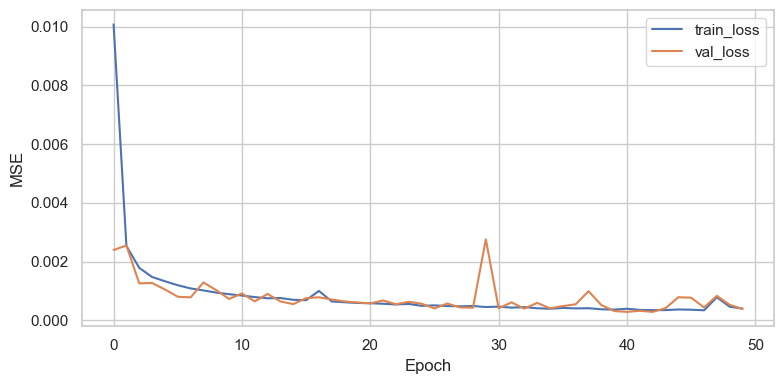

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.tight_layout()
plt.show()


## Evaluación en test


In [9]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test_proc).flatten()

r2  = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2, mse


2281/2281 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step


(0.9949185248016894, 0.0005531671926343234)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared y Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

R-squared: 0.9949
Mean Squared Error: 0.0006


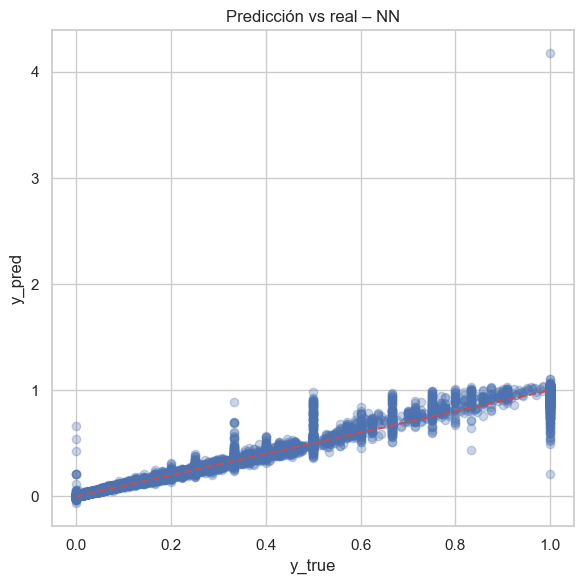

In [10]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.title("Predicción vs real – NN")
plt.tight_layout()
plt.show()
